# Imports

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import os
from collections import Counter
import matplotlib.pyplot as plt

# Data

In [3]:
# look at the train directories
!ls  train

HEPG2-01  HEPG2-06     HUVEC-03  HUVEC-08  HUVEC-13  RPE-01  RPE-06
HEPG2-02  HEPG2-07     HUVEC-04  HUVEC-09  HUVEC-14  RPE-02  RPE-07
HEPG2-03  history.csv  HUVEC-05  HUVEC-10  HUVEC-15  RPE-03  U2OS-01
HEPG2-04  HUVEC-01     HUVEC-06  HUVEC-11  HUVEC-16  RPE-04  U2OS-02
HEPG2-05  HUVEC-02     HUVEC-07  HUVEC-12  models    RPE-05  U2OS-03


In [4]:
# look at the train directories
!ls  test

HEPG2-08  HEPG2-11  HUVEC-19  HUVEC-22	RPE-08	RPE-11
HEPG2-09  HUVEC-17  HUVEC-20  HUVEC-23	RPE-09	U2OS-04
HEPG2-10  HUVEC-18  HUVEC-21  HUVEC-24	RPE-10	U2OS-05


In [5]:
train_dir = [f.path.split('/')[1] for f in os.scandir('train') if f.is_dir()]
test_dir = [f.path.split('/')[1] for f in os.scandir('test') if f.is_dir()]

In [6]:
train_exp = [d.split('-')[0] for d in train_dir]
test_exp = [d.split('-')[0] for d in test_dir]

In [7]:
train_exp_counter = Counter(train_exp)
test_exp_counter = Counter(test_exp)

In [8]:
# remove model directory in train folder
del train_exp_counter['models']

In [9]:
# show experiment count per cell line
train_exp_counter.most_common()

[('HUVEC', 16), ('RPE', 7), ('HEPG2', 7), ('U2OS', 3)]

In [10]:
# show experiment count per cell line
test_exp_counter.most_common()

[('HUVEC', 8), ('HEPG2', 4), ('RPE', 4), ('U2OS', 2)]

In [11]:
exp = ['HUVEC', 'HEPG2', 'RPE', 'U2OS']

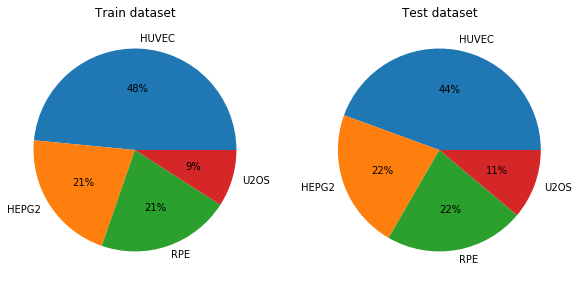

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].title.set_text('Train dataset')
ax[0].pie([float(train_exp_counter[e]) for e in exp], 
        labels=exp, 
        autopct='%1.0f%%');

ax[1].title.set_text('Test dataset')
ax[1].pie([float(test_exp_counter[e]) for e in exp], 
        labels=exp, 
        autopct='%1.0f%%');

Use the last two experiment for ('HUVEC', 16), ('RPE', 7), ('HEPG2', 7) and the last from ('U2OS', 3) as validation set.

In [13]:
# look at the train directories
!ls  train

HEPG2-01  HEPG2-06     HUVEC-03  HUVEC-08  HUVEC-13  RPE-01  RPE-06
HEPG2-02  HEPG2-07     HUVEC-04  HUVEC-09  HUVEC-14  RPE-02  RPE-07
HEPG2-03  history.csv  HUVEC-05  HUVEC-10  HUVEC-15  RPE-03  U2OS-01
HEPG2-04  HUVEC-01     HUVEC-06  HUVEC-11  HUVEC-16  RPE-04  U2OS-02
HEPG2-05  HUVEC-02     HUVEC-07  HUVEC-12  models    RPE-05  U2OS-03


In [14]:
# show experiment count per cell line
train_exp_counter.most_common()

[('HUVEC', 16), ('RPE', 7), ('HEPG2', 7), ('U2OS', 3)]

In [15]:
valid_exp_split = ['HUVEC-15', 'HUVEC-16',
                   'RPE-06', 'RPE-07', 
                   'HEPG2-06', 'HEPG2-07', 
                   'U2OS-03']

# v1

## full_train_dataset_valid-split-ex_v1_20190714.csv

In [3]:
df_train = pd.read_csv('train.csv')

In [9]:
df_train.shape

(36515, 5)

In [7]:
df_train.head()

,id_code,experiment,plate,well,sirna
0,HEPG2-01_1_B03,HEPG2-01,1,B03,513
1,HEPG2-01_1_B04,HEPG2-01,1,B04,840
2,HEPG2-01_1_B05,HEPG2-01,1,B05,1020
3,HEPG2-01_1_B06,HEPG2-01,1,B06,254
4,HEPG2-01_1_B07,HEPG2-01,1,B07,144


In [8]:
df_train.tail()

,id_code,experiment,plate,well,sirna
36510,U2OS-03_4_O19,U2OS-03,4,O19,103
36511,U2OS-03_4_O20,U2OS-03,4,O20,202
36512,U2OS-03_4_O21,U2OS-03,4,O21,824
36513,U2OS-03_4_O22,U2OS-03,4,O22,328
36514,U2OS-03_4_O23,U2OS-03,4,O23,509


In [151]:
df_train.experiment.unique(), len(df_train.experiment.unique())

(array(['HEPG2-01', 'HEPG2-02', 'HEPG2-03', 'HEPG2-04', 'HEPG2-05',
        'HEPG2-06', 'HEPG2-07', 'HUVEC-01', 'HUVEC-02', 'HUVEC-03',
        'HUVEC-04', 'HUVEC-05', 'HUVEC-06', 'HUVEC-07', 'HUVEC-08',
        'HUVEC-09', 'HUVEC-10', 'HUVEC-11', 'HUVEC-12', 'HUVEC-13',
        'HUVEC-14', 'HUVEC-15', 'HUVEC-16', 'RPE-01', 'RPE-02', 'RPE-03',
        'RPE-04', 'RPE-05', 'RPE-06', 'RPE-07', 'U2OS-01', 'U2OS-02',
        'U2OS-03'], dtype=object), 33)

In [152]:
experiments = ['HEPG2-01', 'HEPG2-02', 'HEPG2-03', 'HEPG2-04', 'HEPG2-05', 'HEPG2-06', 'HEPG2-07', 
               'HUVEC-01', 'HUVEC-02', 'HUVEC-03', 'HUVEC-04', 'HUVEC-05', 'HUVEC-06', 'HUVEC-07', 
               'HUVEC-08', 'HUVEC-09', 'HUVEC-10', 'HUVEC-11', 'HUVEC-12', 'HUVEC-13', 'HUVEC-14', 
               'HUVEC-15', 'HUVEC-16', 
               'RPE-01', 'RPE-02', 'RPE-03', 'RPE-04', 'RPE-05', 'RPE-06', 'RPE-07',
               'U2OS-01', 'U2OS-02', 'U2OS-03'
              ]

In [153]:
# setup empty df
df = pd.DataFrame()
# generate path without channel and image file suffix for open image function
df['path'] = df_train['experiment']+'/Plate'+df_train['plate'].apply(str)+'/'+df_train['well']+'_s1' #+'_w'


In [154]:
df['experiment'] = df_train['experiment']

In [155]:
df['sirna'] = df_train['sirna']

In [156]:
df['multi'] = df_train['experiment'].apply(lambda x: x.split('/')[0])+' '+df_train['sirna'].apply(lambda x: str(x))


In [157]:
df.head()

,path,experiment,sirna,multi
0,HEPG2-01/Plate1/B03_s1,HEPG2-01,513,HEPG2-01 513
1,HEPG2-01/Plate1/B04_s1,HEPG2-01,840,HEPG2-01 840
2,HEPG2-01/Plate1/B05_s1,HEPG2-01,1020,HEPG2-01 1020
3,HEPG2-01/Plate1/B06_s1,HEPG2-01,254,HEPG2-01 254
4,HEPG2-01/Plate1/B07_s1,HEPG2-01,144,HEPG2-01 144


In [158]:
# filter for experiments
df = df[df['experiment'].isin(experiments)]

In [159]:
# get rows/images per experiment
[len(df[df['experiment'] == x]) for x in experiments]

[1106,
 1106,
 1108,
 1108,
 1108,
 1108,
 1106,
 1108,
 1108,
 1108,
 1108,
 1108,
 1107,
 1107,
 1108,
 1108,
 1108,
 1108,
 1108,
 1102,
 1090,
 1094,
 1108,
 1108,
 1108,
 1108,
 1107,
 1108,
 1106,
 1108,
 1108,
 1108,
 1108]

In [160]:
df.tail()

,path,experiment,sirna,multi
36510,U2OS-03/Plate4/O19_s1,U2OS-03,103,U2OS-03 103
36511,U2OS-03/Plate4/O20_s1,U2OS-03,202,U2OS-03 202
36512,U2OS-03/Plate4/O21_s1,U2OS-03,824,U2OS-03 824
36513,U2OS-03/Plate4/O22_s1,U2OS-03,328,U2OS-03 328
36514,U2OS-03/Plate4/O23_s1,U2OS-03,509,U2OS-03 509


In [161]:
df['valid'] = 0

In [162]:
for c in valid_exp_split:
    df.loc[df['experiment'] == c,'valid'] = 1

In [163]:
df.head()

,path,experiment,sirna,multi,valid
0,HEPG2-01/Plate1/B03_s1,HEPG2-01,513,HEPG2-01 513,0
1,HEPG2-01/Plate1/B04_s1,HEPG2-01,840,HEPG2-01 840,0
2,HEPG2-01/Plate1/B05_s1,HEPG2-01,1020,HEPG2-01 1020,0
3,HEPG2-01/Plate1/B06_s1,HEPG2-01,254,HEPG2-01 254,0
4,HEPG2-01/Plate1/B07_s1,HEPG2-01,144,HEPG2-01 144,0


In [164]:
df.valid.mean()

0.21191291250171163

In [165]:
df.tail()

,path,experiment,sirna,multi,valid
36510,U2OS-03/Plate4/O19_s1,U2OS-03,103,U2OS-03 103,1
36511,U2OS-03/Plate4/O20_s1,U2OS-03,202,U2OS-03 202,1
36512,U2OS-03/Plate4/O21_s1,U2OS-03,824,U2OS-03 824,1
36513,U2OS-03/Plate4/O22_s1,U2OS-03,328,U2OS-03 328,1
36514,U2OS-03/Plate4/O23_s1,U2OS-03,509,U2OS-03 509,1


In [166]:
# get rows/images per experiment
[len(df[df['experiment'] == x]) for x in experiments]

[1106,
 1106,
 1108,
 1108,
 1108,
 1108,
 1106,
 1108,
 1108,
 1108,
 1108,
 1108,
 1107,
 1107,
 1108,
 1108,
 1108,
 1108,
 1108,
 1102,
 1090,
 1094,
 1108,
 1108,
 1108,
 1108,
 1107,
 1108,
 1106,
 1108,
 1108,
 1108,
 1108]

In [173]:
df.pivot_table(values='valid', index='experiment', aggfunc='sum')['valid'].sum()

7738

In [175]:
df.shape[0]

36515

In [176]:
df.pivot_table(values='valid', index='experiment', aggfunc='sum')['valid'].sum()/df.shape[0]

0.21191291250171163

In [167]:
df.to_csv('full_train_dataset_valid-split-ex_v1_20190714.csv')

## full_test_dataset_v1_20190714.csv

In [179]:
df_test = pd.read_csv('test.csv')

In [180]:
df_test.head()

,id_code,experiment,plate,well
0,HEPG2-08_1_B03,HEPG2-08,1,B03
1,HEPG2-08_1_B04,HEPG2-08,1,B04
2,HEPG2-08_1_B05,HEPG2-08,1,B05
3,HEPG2-08_1_B06,HEPG2-08,1,B06
4,HEPG2-08_1_B07,HEPG2-08,1,B07


In [181]:
df_test.experiment.unique(), len(df_test.experiment.unique())

(array(['HEPG2-08', 'HEPG2-09', 'HEPG2-10', 'HEPG2-11', 'HUVEC-17',
        'HUVEC-18', 'HUVEC-19', 'HUVEC-20', 'HUVEC-21', 'HUVEC-22',
        'HUVEC-23', 'HUVEC-24', 'RPE-08', 'RPE-09', 'RPE-10', 'RPE-11',
        'U2OS-04', 'U2OS-05'], dtype=object), 18)

In [182]:
experiments = ['HEPG2-08', 'HEPG2-09', 'HEPG2-10', 'HEPG2-11', 'HUVEC-17', 'HUVEC-18', 'HUVEC-19', 'HUVEC-20', 'HUVEC-21',
        'HUVEC-22', 'HUVEC-23', 'HUVEC-24', 'RPE-08', 'RPE-09', 'RPE-10', 'RPE-11', 'U2OS-04', 'U2OS-05']

In [183]:
# setup empty df
df = pd.DataFrame()
# generate path without channel and image file suffix for open image function
df['path'] = df_test['experiment']+'/Plate'+df_test['plate'].apply(str)+'/'+df_test['well']+'_s1' #+'_w'


In [184]:
df['experiment'] = df_test['experiment']

In [185]:
df.head()

,path,experiment
0,HEPG2-08/Plate1/B03_s1,HEPG2-08
1,HEPG2-08/Plate1/B04_s1,HEPG2-08
2,HEPG2-08/Plate1/B05_s1,HEPG2-08
3,HEPG2-08/Plate1/B06_s1,HEPG2-08
4,HEPG2-08/Plate1/B07_s1,HEPG2-08


In [186]:
# filter for experiments
df = df[df['experiment'].isin(experiments)]

In [187]:
# get rows/images per experiment
[len(df[df['experiment'] == x]) for x in experiments]

[1107,
 1108,
 1108,
 1106,
 1108,
 1107,
 1108,
 1108,
 1108,
 1108,
 1099,
 1100,
 1108,
 1107,
 1108,
 1094,
 1108,
 1097]

In [188]:
df.tail()

,path,experiment
19892,U2OS-05/Plate4/O19_s1,U2OS-05
19893,U2OS-05/Plate4/O20_s1,U2OS-05
19894,U2OS-05/Plate4/O21_s1,U2OS-05
19895,U2OS-05/Plate4/O22_s1,U2OS-05
19896,U2OS-05/Plate4/O23_s1,U2OS-05


In [189]:
df.shape[0]

19897

In [148]:
df.to_csv('full_test_dataset_v1_20190714.csv')

# v2

## full_train_dataset_valid-split-ex_v2_20190727.csv

In [62]:
df_train = pd.read_csv('train.csv')

In [63]:
df_train.head()

,id_code,experiment,plate,well,sirna
0,HEPG2-01_1_B03,HEPG2-01,1,B03,513
1,HEPG2-01_1_B04,HEPG2-01,1,B04,840
2,HEPG2-01_1_B05,HEPG2-01,1,B05,1020
3,HEPG2-01_1_B06,HEPG2-01,1,B06,254
4,HEPG2-01_1_B07,HEPG2-01,1,B07,144


In [64]:
df_train.experiment.unique(), len(df_train.experiment.unique())

(array(['HEPG2-01', 'HEPG2-02', 'HEPG2-03', 'HEPG2-04', 'HEPG2-05',
        'HEPG2-06', 'HEPG2-07', 'HUVEC-01', 'HUVEC-02', 'HUVEC-03',
        'HUVEC-04', 'HUVEC-05', 'HUVEC-06', 'HUVEC-07', 'HUVEC-08',
        'HUVEC-09', 'HUVEC-10', 'HUVEC-11', 'HUVEC-12', 'HUVEC-13',
        'HUVEC-14', 'HUVEC-15', 'HUVEC-16', 'RPE-01', 'RPE-02', 'RPE-03',
        'RPE-04', 'RPE-05', 'RPE-06', 'RPE-07', 'U2OS-01', 'U2OS-02',
        'U2OS-03'], dtype=object), 33)

In [65]:
experiments = ['HEPG2-01', 'HEPG2-02', 'HEPG2-03', 'HEPG2-04', 'HEPG2-05', 'HEPG2-06', 'HEPG2-07', 
               'HUVEC-01', 'HUVEC-02', 'HUVEC-03', 'HUVEC-04', 'HUVEC-05', 'HUVEC-06', 'HUVEC-07', 
               'HUVEC-08', 'HUVEC-09', 'HUVEC-10', 'HUVEC-11', 'HUVEC-12', 'HUVEC-13', 'HUVEC-14', 
               'HUVEC-15', 'HUVEC-16', 
               'RPE-01', 'RPE-02', 'RPE-03', 'RPE-04', 'RPE-05', 'RPE-06', 'RPE-07',
               'U2OS-01', 'U2OS-02', 'U2OS-03'
              ]

In [66]:
# setup empty df
df1 = pd.DataFrame()
# generate path without channel and image file suffix for open image function
df1['path'] = df_train['experiment']+'/Plate'+df_train['plate'].apply(str)+'/'+df_train['well']+'_s1' #+'_w'


In [67]:
df1['experiment'] = df_train['experiment']

In [68]:
df1['sirna'] = df_train['sirna']

In [69]:
df1['multi'] = df_train['experiment'].apply(lambda x: x.split('/')[0])+' '+df_train['sirna'].apply(lambda x: str(x))


In [70]:
df1.head()

,path,experiment,sirna,multi
0,HEPG2-01/Plate1/B03_s1,HEPG2-01,513,HEPG2-01 513
1,HEPG2-01/Plate1/B04_s1,HEPG2-01,840,HEPG2-01 840
2,HEPG2-01/Plate1/B05_s1,HEPG2-01,1020,HEPG2-01 1020
3,HEPG2-01/Plate1/B06_s1,HEPG2-01,254,HEPG2-01 254
4,HEPG2-01/Plate1/B07_s1,HEPG2-01,144,HEPG2-01 144


In [71]:
# filter for experiments
df1 = df1[df1['experiment'].isin(experiments)]

In [72]:
# get rows/images per experiment
[len(df1[df1['experiment'] == x]) for x in experiments]

[1106,
 1106,
 1108,
 1108,
 1108,
 1108,
 1106,
 1108,
 1108,
 1108,
 1108,
 1108,
 1107,
 1107,
 1108,
 1108,
 1108,
 1108,
 1108,
 1102,
 1090,
 1094,
 1108,
 1108,
 1108,
 1108,
 1107,
 1108,
 1106,
 1108,
 1108,
 1108,
 1108]

In [73]:
df1.tail()

,path,experiment,sirna,multi
36510,U2OS-03/Plate4/O19_s1,U2OS-03,103,U2OS-03 103
36511,U2OS-03/Plate4/O20_s1,U2OS-03,202,U2OS-03 202
36512,U2OS-03/Plate4/O21_s1,U2OS-03,824,U2OS-03 824
36513,U2OS-03/Plate4/O22_s1,U2OS-03,328,U2OS-03 328
36514,U2OS-03/Plate4/O23_s1,U2OS-03,509,U2OS-03 509


In [74]:
df1['valid'] = 0

In [75]:
for c in valid_exp_split:
    df1.loc[df1['experiment'] == c,'valid'] = 1

In [76]:
df1.head()

,path,experiment,sirna,multi,valid
0,HEPG2-01/Plate1/B03_s1,HEPG2-01,513,HEPG2-01 513,0
1,HEPG2-01/Plate1/B04_s1,HEPG2-01,840,HEPG2-01 840,0
2,HEPG2-01/Plate1/B05_s1,HEPG2-01,1020,HEPG2-01 1020,0
3,HEPG2-01/Plate1/B06_s1,HEPG2-01,254,HEPG2-01 254,0
4,HEPG2-01/Plate1/B07_s1,HEPG2-01,144,HEPG2-01 144,0


In [77]:
df1.valid.mean()

0.21191291250171163

In [78]:
df1.tail()

,path,experiment,sirna,multi,valid
36510,U2OS-03/Plate4/O19_s1,U2OS-03,103,U2OS-03 103,1
36511,U2OS-03/Plate4/O20_s1,U2OS-03,202,U2OS-03 202,1
36512,U2OS-03/Plate4/O21_s1,U2OS-03,824,U2OS-03 824,1
36513,U2OS-03/Plate4/O22_s1,U2OS-03,328,U2OS-03 328,1
36514,U2OS-03/Plate4/O23_s1,U2OS-03,509,U2OS-03 509,1


In [79]:
# get rows/images per experiment
[len(df1[df1['experiment'] == x]) for x in experiments]

[1106,
 1106,
 1108,
 1108,
 1108,
 1108,
 1106,
 1108,
 1108,
 1108,
 1108,
 1108,
 1107,
 1107,
 1108,
 1108,
 1108,
 1108,
 1108,
 1102,
 1090,
 1094,
 1108,
 1108,
 1108,
 1108,
 1107,
 1108,
 1106,
 1108,
 1108,
 1108,
 1108]

In [80]:
df1.head()

,path,experiment,sirna,multi,valid
0,HEPG2-01/Plate1/B03_s1,HEPG2-01,513,HEPG2-01 513,0
1,HEPG2-01/Plate1/B04_s1,HEPG2-01,840,HEPG2-01 840,0
2,HEPG2-01/Plate1/B05_s1,HEPG2-01,1020,HEPG2-01 1020,0
3,HEPG2-01/Plate1/B06_s1,HEPG2-01,254,HEPG2-01 254,0
4,HEPG2-01/Plate1/B07_s1,HEPG2-01,144,HEPG2-01 144,0


In [81]:
# copy dataframe to get rows for site 2
df2 = df1.copy()

In [82]:
# replace site 1 with site 2
df2['path'] = df2['path'].apply(lambda x: x[:-1]+'2')

In [83]:
df2.head()

,path,experiment,sirna,multi,valid
0,HEPG2-01/Plate1/B03_s2,HEPG2-01,513,HEPG2-01 513,0
1,HEPG2-01/Plate1/B04_s2,HEPG2-01,840,HEPG2-01 840,0
2,HEPG2-01/Plate1/B05_s2,HEPG2-01,1020,HEPG2-01 1020,0
3,HEPG2-01/Plate1/B06_s2,HEPG2-01,254,HEPG2-01 254,0
4,HEPG2-01/Plate1/B07_s2,HEPG2-01,144,HEPG2-01 144,0


In [84]:
df_full = pd.concat((df1, df2))

In [85]:
df1.shape, df2.shape, df_full.shape

((36515, 5), (36515, 5), (73030, 5))

In [86]:
df_full.pivot_table(values='valid', index='experiment', aggfunc='sum')['valid'].sum()

15476

In [87]:
df_full.shape[0]

73030

In [42]:
df_full.pivot_table(values='valid', index='experiment', aggfunc='sum')['valid'].sum()/df_full.shape[0]

0.21191291250171163

In [43]:
df_full.to_csv('full_train_dataset_valid-split-ex_v2_20190727.csv')

## full_test_dataset_v2_20190727.csv

In [89]:
df_test = pd.read_csv('test.csv')

In [90]:
df_test.head()

,id_code,experiment,plate,well
0,HEPG2-08_1_B03,HEPG2-08,1,B03
1,HEPG2-08_1_B04,HEPG2-08,1,B04
2,HEPG2-08_1_B05,HEPG2-08,1,B05
3,HEPG2-08_1_B06,HEPG2-08,1,B06
4,HEPG2-08_1_B07,HEPG2-08,1,B07


In [91]:
df_test.experiment.unique(), len(df_test.experiment.unique())

(array(['HEPG2-08', 'HEPG2-09', 'HEPG2-10', 'HEPG2-11', 'HUVEC-17',
        'HUVEC-18', 'HUVEC-19', 'HUVEC-20', 'HUVEC-21', 'HUVEC-22',
        'HUVEC-23', 'HUVEC-24', 'RPE-08', 'RPE-09', 'RPE-10', 'RPE-11',
        'U2OS-04', 'U2OS-05'], dtype=object), 18)

In [92]:
experiments = ['HEPG2-08', 'HEPG2-09', 'HEPG2-10', 'HEPG2-11', 'HUVEC-17', 'HUVEC-18', 'HUVEC-19', 'HUVEC-20', 'HUVEC-21',
        'HUVEC-22', 'HUVEC-23', 'HUVEC-24', 'RPE-08', 'RPE-09', 'RPE-10', 'RPE-11', 'U2OS-04', 'U2OS-05']

In [93]:
# setup empty df
df1 = pd.DataFrame()
# generate path without channel and image file suffix for open image function
df1['path'] = df_test['experiment']+'/Plate'+df_test['plate'].apply(str)+'/'+df_test['well']+'_s1' #+'_w'


In [94]:
df1['experiment'] = df_test['experiment']

In [95]:
df1.head()

,path,experiment
0,HEPG2-08/Plate1/B03_s1,HEPG2-08
1,HEPG2-08/Plate1/B04_s1,HEPG2-08
2,HEPG2-08/Plate1/B05_s1,HEPG2-08
3,HEPG2-08/Plate1/B06_s1,HEPG2-08
4,HEPG2-08/Plate1/B07_s1,HEPG2-08


In [96]:
# filter for experiments
df1 = df1[df1['experiment'].isin(experiments)]

In [97]:
# get rows/images per experiment
[len(df1[df1['experiment'] == x]) for x in experiments]

[1107,
 1108,
 1108,
 1106,
 1108,
 1107,
 1108,
 1108,
 1108,
 1108,
 1099,
 1100,
 1108,
 1107,
 1108,
 1094,
 1108,
 1097]

In [98]:
df1.tail()

,path,experiment
19892,U2OS-05/Plate4/O19_s1,U2OS-05
19893,U2OS-05/Plate4/O20_s1,U2OS-05
19894,U2OS-05/Plate4/O21_s1,U2OS-05
19895,U2OS-05/Plate4/O22_s1,U2OS-05
19896,U2OS-05/Plate4/O23_s1,U2OS-05


In [99]:
# copy dataframe to get rows for site 2
df2 = df1.copy()

In [100]:
# replace site 1 with site 2
df2['path'] = df2['path'].apply(lambda x: x[:-1]+'2')

In [101]:
df2.head()

,path,experiment
0,HEPG2-08/Plate1/B03_s2,HEPG2-08
1,HEPG2-08/Plate1/B04_s2,HEPG2-08
2,HEPG2-08/Plate1/B05_s2,HEPG2-08
3,HEPG2-08/Plate1/B06_s2,HEPG2-08
4,HEPG2-08/Plate1/B07_s2,HEPG2-08


In [102]:
df_full = pd.concat((df1, df2))

In [103]:
df1.shape, df2.shape, df_full.shape

((19897, 2), (19897, 2), (39794, 2))

In [104]:
df_full.shape[0]

39794

In [51]:
df_full.to_csv('full_test_dataset_v2_20190727.csv')

# v3

## full_train_dataset_valid-split-ex_v3_20190731.csv

In [25]:
df_train = pd.read_csv('train.csv')

In [26]:
df_train.shape

(36515, 5)

In [27]:
df_train.head()

,id_code,experiment,plate,well,sirna
0,HEPG2-01_1_B03,HEPG2-01,1,B03,513
1,HEPG2-01_1_B04,HEPG2-01,1,B04,840
2,HEPG2-01_1_B05,HEPG2-01,1,B05,1020
3,HEPG2-01_1_B06,HEPG2-01,1,B06,254
4,HEPG2-01_1_B07,HEPG2-01,1,B07,144


In [18]:
df_train.experiment.unique(), len(df_train.experiment.unique())

(array(['HEPG2-01', 'HEPG2-02', 'HEPG2-03', 'HEPG2-04', 'HEPG2-05',
        'HEPG2-06', 'HEPG2-07', 'HUVEC-01', 'HUVEC-02', 'HUVEC-03',
        'HUVEC-04', 'HUVEC-05', 'HUVEC-06', 'HUVEC-07', 'HUVEC-08',
        'HUVEC-09', 'HUVEC-10', 'HUVEC-11', 'HUVEC-12', 'HUVEC-13',
        'HUVEC-14', 'HUVEC-15', 'HUVEC-16', 'RPE-01', 'RPE-02', 'RPE-03',
        'RPE-04', 'RPE-05', 'RPE-06', 'RPE-07', 'U2OS-01', 'U2OS-02',
        'U2OS-03'], dtype=object), 33)

In [19]:
experiments = ['HEPG2-01', 'HEPG2-02', 'HEPG2-03', 'HEPG2-04', 'HEPG2-05', 'HEPG2-06', 'HEPG2-07', 
               'HUVEC-01', 'HUVEC-02', 'HUVEC-03', 'HUVEC-04', 'HUVEC-05', 'HUVEC-06', 'HUVEC-07', 
               'HUVEC-08', 'HUVEC-09', 'HUVEC-10', 'HUVEC-11', 'HUVEC-12', 'HUVEC-13', 'HUVEC-14', 
               'HUVEC-15', 'HUVEC-16', 
               'RPE-01', 'RPE-02', 'RPE-03', 'RPE-04', 'RPE-05', 'RPE-06', 'RPE-07',
               'U2OS-01', 'U2OS-02', 'U2OS-03'
              ]

In [20]:
# setup empty df
df1 = pd.DataFrame()
# generate path without channel and image file suffix for open image function
df1['path'] = df_train['experiment']+'/Plate'+df_train['plate'].apply(str)+'/'+df_train['well']+'_s1' #+'_w'


In [21]:
df1['experiment'] = df_train['experiment']

In [22]:
df1['sirna'] = df_train['sirna']

In [23]:
df1['multi'] = df_train['experiment'].apply(lambda x: x.split('/')[0])+' '+df_train['sirna'].apply(lambda x: str(x))


In [24]:
df1.head()

,path,experiment,sirna,multi
0,HEPG2-01/Plate1/B03_s1,HEPG2-01,513,HEPG2-01 513
1,HEPG2-01/Plate1/B04_s1,HEPG2-01,840,HEPG2-01 840
2,HEPG2-01/Plate1/B05_s1,HEPG2-01,1020,HEPG2-01 1020
3,HEPG2-01/Plate1/B06_s1,HEPG2-01,254,HEPG2-01 254
4,HEPG2-01/Plate1/B07_s1,HEPG2-01,144,HEPG2-01 144


In [25]:
# filter for experiments
df1 = df1[df1['experiment'].isin(experiments)]

In [26]:
# get rows/images per experiment
[len(df1[df1['experiment'] == x]) for x in experiments]

[1106,
 1106,
 1108,
 1108,
 1108,
 1108,
 1106,
 1108,
 1108,
 1108,
 1108,
 1108,
 1107,
 1107,
 1108,
 1108,
 1108,
 1108,
 1108,
 1102,
 1090,
 1094,
 1108,
 1108,
 1108,
 1108,
 1107,
 1108,
 1106,
 1108,
 1108,
 1108,
 1108]

In [27]:
df1.tail()

,path,experiment,sirna,multi
36510,U2OS-03/Plate4/O19_s1,U2OS-03,103,U2OS-03 103
36511,U2OS-03/Plate4/O20_s1,U2OS-03,202,U2OS-03 202
36512,U2OS-03/Plate4/O21_s1,U2OS-03,824,U2OS-03 824
36513,U2OS-03/Plate4/O22_s1,U2OS-03,328,U2OS-03 328
36514,U2OS-03/Plate4/O23_s1,U2OS-03,509,U2OS-03 509


In [28]:
train_exp_split_1 = ['HEPG2-01', 'HEPG2-02', 'HEPG2-03',
                     'HUVEC-01', 'HUVEC-02', 'HUVEC-03', 'HUVEC-04', 'HUVEC-06', 'HUVEC-13', 'HUVEC-07', 
                     'RPE-01', 'RPE-04',
                     'U2OS-01']

train_exp_split_2 = ['HEPG2-04', 'HEPG2-05',
                     'HUVEC-08', 'HUVEC-09', 'HUVEC-10', 'HUVEC-11', 'HUVEC-12', 'HUVEC-05', 'HUVEC-14',
                     'RPE-03', 'RPE-02', 'RPE-05',
                     'U2OS-02']

valid_exp_split = ['HEPG2-06', 'HEPG2-07',
                   'HUVEC-15', 'HUVEC-16',
                   'RPE-06', 'RPE-07',
                   'U2OS-03']

In [29]:
# get rows/images per experiment
len_total = sum([len(df1[df1['experiment'] == x]) for x in experiments])
len_train_split_1 = sum([len(df1[df1['experiment'] == x]) for x in train_exp_split_1])
len_train_split_2 = sum([len(df1[df1['experiment'] == x]) for x in train_exp_split_2])
len_valid_split = sum([len(df1[df1['experiment'] == x]) for x in valid_exp_split])

In [30]:
from itertools import zip_longest

In [31]:
[*zip_longest([(x, len(df1[df1['experiment'] == x])) for x in train_exp_split_1], [(x, len(df1[df1['experiment'] == x])) for x in train_exp_split_2])]

[(('HEPG2-01', 1106), ('HEPG2-04', 1108)),
 (('HEPG2-02', 1106), ('HEPG2-05', 1108)),
 (('HEPG2-03', 1108), ('HUVEC-08', 1108)),
 (('HUVEC-01', 1108), ('HUVEC-09', 1108)),
 (('HUVEC-02', 1108), ('HUVEC-10', 1108)),
 (('HUVEC-03', 1108), ('HUVEC-11', 1108)),
 (('HUVEC-04', 1108), ('HUVEC-12', 1108)),
 (('HUVEC-06', 1107), ('HUVEC-05', 1108)),
 (('HUVEC-13', 1102), ('HUVEC-14', 1090)),
 (('HUVEC-07', 1107), ('RPE-03', 1108)),
 (('RPE-01', 1108), ('RPE-02', 1108)),
 (('RPE-04', 1107), ('RPE-05', 1108)),
 (('U2OS-01', 1108), ('U2OS-02', 1108))]

In [32]:
len_total, len_train_split_1, len_train_split_2, len_valid_split

(36515, 14391, 14386, 7738)

In [33]:
assert len_total == len_train_split_1+len_train_split_2+len_valid_split

In [34]:
len_train_split_1 - len_train_split_2

5

In [35]:
df1['train1'] = 0
df1['train1val'] = 0
for c in train_exp_split_1:
    df1.loc[df1['experiment'] == c,'train1'] = 1
    df1.loc[df1['experiment'] == c,'train1val'] = 1

In [36]:
df1['train2'] = 0
for c in train_exp_split_2:
    df1.loc[df1['experiment'] == c,'train2'] = 1

In [37]:
df1['valid'] = 0
for c in valid_exp_split:
    df1.loc[df1['experiment'] == c,'valid'] = 1
    # add validation to train1 otherwise databunch split is not working
    df1.loc[df1['experiment'] == c,'train1val'] = 1

In [38]:
df1.tail()

,path,experiment,sirna,multi,train1,train1val,train2,valid
36510,U2OS-03/Plate4/O19_s1,U2OS-03,103,U2OS-03 103,0,1,0,1
36511,U2OS-03/Plate4/O20_s1,U2OS-03,202,U2OS-03 202,0,1,0,1
36512,U2OS-03/Plate4/O21_s1,U2OS-03,824,U2OS-03 824,0,1,0,1
36513,U2OS-03/Plate4/O22_s1,U2OS-03,328,U2OS-03 328,0,1,0,1
36514,U2OS-03/Plate4/O23_s1,U2OS-03,509,U2OS-03 509,0,1,0,1


In [39]:
df1.train1.mean(), df1.train2.mean(), df1.valid.mean()

(0.3941120087635218, 0.39397507873476656, 0.21191291250171163)

In [41]:
assert 1 == df1.train1.mean()+df1.train2.mean()+df1.valid.mean()

In [42]:
# copy dataframe to get rows for site 2
df2 = df1.copy()

In [43]:
# replace site 1 with site 2
df2['path'] = df2['path'].apply(lambda x: x[:-1]+'2')

In [44]:
df2.head()

,path,experiment,sirna,multi,train1,train1val,train2,valid
0,HEPG2-01/Plate1/B03_s2,HEPG2-01,513,HEPG2-01 513,1,1,0,0
1,HEPG2-01/Plate1/B04_s2,HEPG2-01,840,HEPG2-01 840,1,1,0,0
2,HEPG2-01/Plate1/B05_s2,HEPG2-01,1020,HEPG2-01 1020,1,1,0,0
3,HEPG2-01/Plate1/B06_s2,HEPG2-01,254,HEPG2-01 254,1,1,0,0
4,HEPG2-01/Plate1/B07_s2,HEPG2-01,144,HEPG2-01 144,1,1,0,0


In [58]:
# move the last 5 *_s2 files from train1 to train2 to have a same image count in train1 and train 2
df2.loc[:4,['train1val']] = 0
df2.loc[:4,['train2']] = 1

In [59]:
df2.head(6)

,path,experiment,sirna,multi,train1,train1val,train2,valid
0,HEPG2-01/Plate1/B03_s2,HEPG2-01,513,HEPG2-01 513,0,0,1,0
1,HEPG2-01/Plate1/B04_s2,HEPG2-01,840,HEPG2-01 840,0,0,1,0
2,HEPG2-01/Plate1/B05_s2,HEPG2-01,1020,HEPG2-01 1020,0,0,1,0
3,HEPG2-01/Plate1/B06_s2,HEPG2-01,254,HEPG2-01 254,0,0,1,0
4,HEPG2-01/Plate1/B07_s2,HEPG2-01,144,HEPG2-01 144,0,0,1,0
5,HEPG2-01/Plate1/B08_s2,HEPG2-01,503,HEPG2-01 503,1,1,0,0


In [60]:
df_full = pd.concat((df1, df2))

In [62]:
df_full.train1.sum(), df_full.train1val.sum()-df_full.valid.sum(), df_full.train2.sum()

(28777, 28777, 28777)

In [63]:
df_full.train1.sum()-df_full.train2.sum()

0

In [64]:
df1.shape, df2.shape, df_full.shape

((36515, 8), (36515, 8), (73030, 8))

In [65]:
df_full.pivot_table(values='valid', index='experiment', aggfunc='sum')['valid'].sum()

15476

In [66]:
df_full.shape[0]

73030

In [67]:
df_full.pivot_table(values='valid', index='experiment', aggfunc='sum')['valid'].sum()/df_full.shape[0]

0.21191291250171163

In [68]:
df_full.to_csv('full_train_dataset_valid-split-ex_v3_20190731.csv')

# v2 + plate groups

In [88]:
df_full_train = df_full.copy()

In [105]:
df_full_test = df_full.copy()

In [106]:
df_full_train.shape

(73030, 5)

In [107]:
df_full_test.shape

(39794, 2)

In [108]:
df_full_train.head()

,path,experiment,sirna,multi,valid
0,HEPG2-01/Plate1/B03_s1,HEPG2-01,513,HEPG2-01 513,0
1,HEPG2-01/Plate1/B04_s1,HEPG2-01,840,HEPG2-01 840,0
2,HEPG2-01/Plate1/B05_s1,HEPG2-01,1020,HEPG2-01 1020,0
3,HEPG2-01/Plate1/B06_s1,HEPG2-01,254,HEPG2-01 254,0
4,HEPG2-01/Plate1/B07_s1,HEPG2-01,144,HEPG2-01 144,0


In [109]:
df_full_test.head()

,path,experiment
0,HEPG2-08/Plate1/B03_s1,HEPG2-08
1,HEPG2-08/Plate1/B04_s1,HEPG2-08
2,HEPG2-08/Plate1/B05_s1,HEPG2-08
3,HEPG2-08/Plate1/B06_s1,HEPG2-08
4,HEPG2-08/Plate1/B07_s1,HEPG2-08


In [110]:
train_plate_groups = pd.read_csv('train_plate_groups.csv', names=['experiment','group'])

In [111]:
test_plate_groups = pd.read_csv('test_plate_groups.csv', names=['experiment','group'])

In [112]:
train_plate_groups

,experiment,group
0,HEPG2-01,0
1,HEPG2-02,0
2,HEPG2-03,0
3,HEPG2-04,0
4,HEPG2-05,1
5,HEPG2-06,0
6,HEPG2-07,0
7,HUVEC-01,0
8,HUVEC-02,0
9,HUVEC-03,0


In [113]:
test_plate_groups

,experiment,group
0,HEPG2-08,3
1,HEPG2-09,1
2,HEPG2-10,0
3,HEPG2-11,0
4,HUVEC-17,0
5,HUVEC-18,0
6,HUVEC-19,2
7,HUVEC-20,2
8,HUVEC-21,3
9,HUVEC-22,0


In [114]:
train_plate_groups[train_plate_groups['experiment'] == 'HUVEC-08']

,experiment,group
14,HUVEC-08,0


In [115]:
groups = {0: '1234',
          1: '3412',
          2: '2341',
          3: '4123', # ???
         }

In [133]:
df_full_train_group = pd.merge(df_full_train, train_plate_groups, on='experiment', how='left')
df_full_test_group = pd.merge(df_full_test, test_plate_groups, on='experiment', how='left')


In [134]:
df_full_train_group['group_pattern'] = df_full_train_group['group'].apply(lambda x: groups[x])
df_full_test_group['group_pattern'] = df_full_test_group['group'].apply(lambda x: groups[x])


In [135]:
df_full_train_group['plate'] = df_full_train_group['path'].apply(lambda x: x.split('Plate')[1][0])
df_full_test_group['plate'] = df_full_test_group['path'].apply(lambda x: x.split('Plate')[1][0])


In [136]:
def get_plate_from_pattern(x):
    return int(str(x[-2])[int(x[-1])-1])-1 #substract 1 because the embedding starts at 0

In [137]:
df_full_train_group['plate_pattern'] = df_full_train_group.apply(get_plate_from_pattern, axis=1)
df_full_test_group['plate_pattern'] = df_full_test_group.apply(get_plate_from_pattern, axis=1)


In [150]:
df_full_train_group[df_full_train_group['plate_pattern'] == '3']

,path,experiment,sirna,multi,valid,group,group_pattern,plate,plate_pattern


In [146]:
df_full_train_group[df_full_train_group['plate'] == '1'].tail()

,path,experiment,sirna,multi,valid,group,group_pattern,plate,plate_pattern
72194,U2OS-03/Plate1/O19_s2,U2OS-03,764,U2OS-03 764,1,0,1234,1,0
72195,U2OS-03/Plate1/O20_s2,U2OS-03,1065,U2OS-03 1065,1,0,1234,1,0
72196,U2OS-03/Plate1/O21_s2,U2OS-03,301,U2OS-03 301,1,0,1234,1,0
72197,U2OS-03/Plate1/O22_s2,U2OS-03,757,U2OS-03 757,1,0,1234,1,0
72198,U2OS-03/Plate1/O23_s2,U2OS-03,831,U2OS-03 831,1,0,1234,1,0


In [147]:
df_full_train_group[df_full_train_group['group_pattern'] == '3412'].head()

,path,experiment,sirna,multi,valid,group,group_pattern,plate,plate_pattern
4428,HEPG2-05/Plate1/B03_s1,HEPG2-05,151,HEPG2-05 151,0,1,3412,1,2
4429,HEPG2-05/Plate1/B04_s1,HEPG2-05,808,HEPG2-05 808,0,1,3412,1,2
4430,HEPG2-05/Plate1/B05_s1,HEPG2-05,465,HEPG2-05 465,0,1,3412,1,2
4431,HEPG2-05/Plate1/B06_s1,HEPG2-05,570,HEPG2-05 570,0,1,3412,1,2
4432,HEPG2-05/Plate1/B07_s1,HEPG2-05,180,HEPG2-05 180,0,1,3412,1,2


In [148]:
df_full_test_group[df_full_test_group['group_pattern'] == '4123'].head()

,path,experiment,group,group_pattern,plate,plate_pattern
0,HEPG2-08/Plate1/B03_s1,HEPG2-08,3,4123,1,3
1,HEPG2-08/Plate1/B04_s1,HEPG2-08,3,4123,1,3
2,HEPG2-08/Plate1/B05_s1,HEPG2-08,3,4123,1,3
3,HEPG2-08/Plate1/B06_s1,HEPG2-08,3,4123,1,3
4,HEPG2-08/Plate1/B07_s1,HEPG2-08,3,4123,1,3


In [156]:
df_full_test_group[((df_full_test_group['group_pattern'] == '4123') & (df_full_test_group['experiment'] == 'HEPG2-08'))]
                    

,path,experiment,group,group_pattern,plate,plate_pattern
0,HEPG2-08/Plate1/B03_s1,HEPG2-08,3,4123,1,3
1,HEPG2-08/Plate1/B04_s1,HEPG2-08,3,4123,1,3
2,HEPG2-08/Plate1/B05_s1,HEPG2-08,3,4123,1,3
3,HEPG2-08/Plate1/B06_s1,HEPG2-08,3,4123,1,3
4,HEPG2-08/Plate1/B07_s1,HEPG2-08,3,4123,1,3
5,HEPG2-08/Plate1/B08_s1,HEPG2-08,3,4123,1,3
6,HEPG2-08/Plate1/B09_s1,HEPG2-08,3,4123,1,3
7,HEPG2-08/Plate1/B10_s1,HEPG2-08,3,4123,1,3
8,HEPG2-08/Plate1/B11_s1,HEPG2-08,3,4123,1,3
9,HEPG2-08/Plate1/B12_s1,HEPG2-08,3,4123,1,3


In [225]:
df_full_train_group.to_csv('full_train_dataset_v2_plate_groups_20190812.csv')

In [226]:
df_full_test_group.to_csv('full_test_dataset_v2_plate_groups_20190812.csv')

In [227]:
df_full_train_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73030 entries, 0 to 73029
Data columns (total 9 columns):
path             73030 non-null object
experiment       73030 non-null object
sirna            73030 non-null int64
multi            73030 non-null object
valid            73030 non-null int64
group            73030 non-null int64
group_pattern    73030 non-null object
plate            73030 non-null object
plate_pattern    73030 non-null int64
dtypes: int64(4), object(5)
memory usage: 5.6+ MB


In [228]:
df_full_test_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39794 entries, 0 to 39793
Data columns (total 6 columns):
path             39794 non-null object
experiment       39794 non-null object
group            39794 non-null int64
group_pattern    39794 non-null object
plate            39794 non-null object
plate_pattern    39794 non-null int64
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


In [229]:
df_full_train_group[['path','plate_pattern']].head()

,path,plate_pattern
0,HEPG2-01/Plate1/B03_s1,0
1,HEPG2-01/Plate1/B04_s1,0
2,HEPG2-01/Plate1/B05_s1,0
3,HEPG2-01/Plate1/B06_s1,0
4,HEPG2-01/Plate1/B07_s1,0


In [230]:
df_full_test_group[['path','plate_pattern']].head()

,path,plate_pattern
0,HEPG2-08/Plate1/B03_s1,3
1,HEPG2-08/Plate1/B04_s1,3
2,HEPG2-08/Plate1/B05_s1,3
3,HEPG2-08/Plate1/B06_s1,3
4,HEPG2-08/Plate1/B07_s1,3


In [231]:
df_full_train_group['path'] = df_full_train_group['path'].apply(lambda x: 'train/'+x)
df_full_test_group['path'] = df_full_test_group['path'].apply(lambda x: 'test/'+x)

In [232]:
df_full_plate_pattern = pd.concat([df_full_train_group[['path','plate_pattern']],
                                   df_full_test_group[['path','plate_pattern']]], axis=0)

In [233]:
df_full_plate_pattern.head()

,path,plate_pattern
0,train/HEPG2-01/Plate1/B03_s1,0
1,train/HEPG2-01/Plate1/B04_s1,0
2,train/HEPG2-01/Plate1/B05_s1,0
3,train/HEPG2-01/Plate1/B06_s1,0
4,train/HEPG2-01/Plate1/B07_s1,0


In [234]:
df_full_plate_pattern.tail()

,path,plate_pattern
39789,test/U2OS-05/Plate4/O19_s2,2
39790,test/U2OS-05/Plate4/O20_s2,2
39791,test/U2OS-05/Plate4/O21_s2,2
39792,test/U2OS-05/Plate4/O22_s2,2
39793,test/U2OS-05/Plate4/O23_s2,2


In [235]:
df_full_plate_pattern.to_csv('full_dataset_v2_path_plate_groups_only_20190812.csv')

In [236]:
df_full_plate_pattern.head()

,path,plate_pattern
0,train/HEPG2-01/Plate1/B03_s1,0
1,train/HEPG2-01/Plate1/B04_s1,0
2,train/HEPG2-01/Plate1/B05_s1,0
3,train/HEPG2-01/Plate1/B06_s1,0
4,train/HEPG2-01/Plate1/B07_s1,0


In [237]:
#dict(zip(df_full_plate_pattern.path.values, df_full_plate_pattern.plate_pattern.values))

# v2 + plate groups + celltype

## full_train_dataset_valid-split-ex_v2_ct_20190824.csv

In [4]:
df_train = pd.read_csv('full_train_dataset_valid-split-ex_v2_20190727.csv', index_col=0)

In [5]:
df_train.head()

,path,experiment,sirna,multi,valid
0,HEPG2-01/Plate1/B03_s1,HEPG2-01,513,HEPG2-01 513,0
1,HEPG2-01/Plate1/B04_s1,HEPG2-01,840,HEPG2-01 840,0
2,HEPG2-01/Plate1/B05_s1,HEPG2-01,1020,HEPG2-01 1020,0
3,HEPG2-01/Plate1/B06_s1,HEPG2-01,254,HEPG2-01 254,0
4,HEPG2-01/Plate1/B07_s1,HEPG2-01,144,HEPG2-01 144,0


In [6]:
df_train['celltype'] = df_train['experiment'].apply(lambda x: x.split('-')[0])

In [7]:
df_train.head()

,path,experiment,sirna,multi,valid,celltype
0,HEPG2-01/Plate1/B03_s1,HEPG2-01,513,HEPG2-01 513,0,HEPG2
1,HEPG2-01/Plate1/B04_s1,HEPG2-01,840,HEPG2-01 840,0,HEPG2
2,HEPG2-01/Plate1/B05_s1,HEPG2-01,1020,HEPG2-01 1020,0,HEPG2
3,HEPG2-01/Plate1/B06_s1,HEPG2-01,254,HEPG2-01 254,0,HEPG2
4,HEPG2-01/Plate1/B07_s1,HEPG2-01,144,HEPG2-01 144,0,HEPG2


In [8]:
df_train['celltype'].unique()

array(['HEPG2', 'HUVEC', 'RPE', 'U2OS'], dtype=object)

In [9]:
cts = ['HEPG2', 'HUVEC', 'RPE', 'U2OS']

In [13]:
# check validation set balance
for ct in cts:
    print(ct)
    print('total:', len(df_train[df_train['celltype'] == ct]))
    print('valid:', df_train[df_train['celltype'] == ct].valid.sum(), df_train[df_train['celltype'] == ct].valid.mean())

HEPG2
total: 15500
valid: 4428 0.2856774193548387
HUVEC
total: 35376
valid: 4404 0.12449118046132972
RPE
total: 15506
valid: 4428 0.2855668773378047
U2OS
total: 6648
valid: 2216 0.3333333333333333


In [36]:
df_train.to_csv('full_train_dataset_valid-split-ex_v2_ct_20190824.csv')

## full_test_dataset_v2_ct_20190824.csv

In [14]:
df_test = pd.read_csv('full_test_dataset_v2_20190727.csv', index_col=0)

In [15]:
df_test.head()

,path,experiment
0,HEPG2-08/Plate1/B03_s1,HEPG2-08
1,HEPG2-08/Plate1/B04_s1,HEPG2-08
2,HEPG2-08/Plate1/B05_s1,HEPG2-08
3,HEPG2-08/Plate1/B06_s1,HEPG2-08
4,HEPG2-08/Plate1/B07_s1,HEPG2-08


In [16]:
df_test['celltype'] = df_test['experiment'].apply(lambda x: x.split('-')[0])

In [17]:
df_test.head()

,path,experiment,celltype
0,HEPG2-08/Plate1/B03_s1,HEPG2-08,HEPG2
1,HEPG2-08/Plate1/B04_s1,HEPG2-08,HEPG2
2,HEPG2-08/Plate1/B05_s1,HEPG2-08,HEPG2
3,HEPG2-08/Plate1/B06_s1,HEPG2-08,HEPG2
4,HEPG2-08/Plate1/B07_s1,HEPG2-08,HEPG2


In [21]:
df_test.tail()

,path,experiment,celltype
19892,U2OS-05/Plate4/O19_s2,U2OS-05,U2OS
19893,U2OS-05/Plate4/O20_s2,U2OS-05,U2OS
19894,U2OS-05/Plate4/O21_s2,U2OS-05,U2OS
19895,U2OS-05/Plate4/O22_s2,U2OS-05,U2OS
19896,U2OS-05/Plate4/O23_s2,U2OS-05,U2OS


In [18]:
df_test['celltype'].unique()

array(['HEPG2', 'HUVEC', 'RPE', 'U2OS'], dtype=object)

In [19]:
# check validation set balance
for ct in cts:
    print(ct)
    print('total:', len(df_train[df_train['celltype'] == ct]))
    print('valid:', df_train[df_train['celltype'] == ct].valid.sum(), df_train[df_train['celltype'] == ct].valid.mean())
    print('test:', len(df_test[df_test['celltype'] == ct]))

HEPG2
total: 15500
valid: 4428 0.2856774193548387
test: 8858
HUVEC
total: 35376
valid: 4404 0.12449118046132972
test: 17692
RPE
total: 15506
valid: 4428 0.2855668773378047
test: 8834
U2OS
total: 6648
valid: 2216 0.3333333333333333
test: 4410


In [43]:
df_test.to_csv('full_test_dataset_v2_ct_20190824.csv')

# Controls

In [4]:
!ls *.csv

full_dataset_v2_path_plate_groups_only_20190812.csv   pixel_stats.csv
full_test_dataset_v1_20190714.csv		      sirna_groups.csv
full_test_dataset_v2_20190727.csv		      test_controls.csv
full_test_dataset_v2_ct_20190824.csv		      test.csv
full_test_dataset_v2_plate_groups_20190812.csv	      test_plate_groups.csv
full_train_dataset_v2_plate_groups_20190812.csv       train_controls.csv
full_train_dataset_valid-split-ex_v1_20190714.csv     train.csv
full_train_dataset_valid-split-ex_v2_20190727.csv     train_plate_groups.csv
full_train_dataset_valid-split-ex_v2_ct_20190824.csv  train_sorted.csv
full_train_dataset_valid-split-ex_v3_20190731.csv     train_sorted_multi.csv


In [5]:
pd.read_csv('train_controls.csv')

,id_code,experiment,plate,well,sirna,well_type
0,HEPG2-01_1_B02,HEPG2-01,1,B02,1138,negative_control
1,HEPG2-01_1_C03,HEPG2-01,1,C03,1109,positive_control
2,HEPG2-01_1_C07,HEPG2-01,1,C07,1121,positive_control
3,HEPG2-01_1_C11,HEPG2-01,1,C11,1126,positive_control
4,HEPG2-01_1_C15,HEPG2-01,1,C15,1118,positive_control
5,HEPG2-01_1_C19,HEPG2-01,1,C19,1116,positive_control
6,HEPG2-01_1_C22,HEPG2-01,1,C22,1110,positive_control
7,HEPG2-01_1_F03,HEPG2-01,1,F03,1113,positive_control
8,HEPG2-01_1_F07,HEPG2-01,1,F07,1114,positive_control
9,HEPG2-01_1_F11,HEPG2-01,1,F11,1137,positive_control


# Old

See notebook "rcic_multicat_v6_resnet18u34_baseline_adversarial_full.ipynb" section 3.3.1 and 3.3.2.

## Adversarial test dataset setup

In [61]:
df_train = pd.read_csv('train.csv')

In [62]:
df_train.head()

,id_code,experiment,plate,well,sirna
0,HEPG2-01_1_B03,HEPG2-01,1,B03,513
1,HEPG2-01_1_B04,HEPG2-01,1,B04,840
2,HEPG2-01_1_B05,HEPG2-01,1,B05,1020
3,HEPG2-01_1_B06,HEPG2-01,1,B06,254
4,HEPG2-01_1_B07,HEPG2-01,1,B07,144


In [63]:
df_train.experiment.unique(), len(df_train.experiment.unique())

(array(['HEPG2-01', 'HEPG2-02', 'HEPG2-03', 'HEPG2-04', 'HEPG2-05', 'HEPG2-06', 'HEPG2-07', 'HUVEC-01', 'HUVEC-02',
        'HUVEC-03', 'HUVEC-04', 'HUVEC-05', 'HUVEC-06', 'HUVEC-07', 'HUVEC-08', 'HUVEC-09', 'HUVEC-10', 'HUVEC-11',
        'HUVEC-12', 'HUVEC-13', 'HUVEC-14', 'HUVEC-15', 'HUVEC-16', 'RPE-01', 'RPE-02', 'RPE-03', 'RPE-04', 'RPE-05',
        'RPE-06', 'RPE-07', 'U2OS-01', 'U2OS-02', 'U2OS-03'], dtype=object),
 33)

In [64]:
experiments = ['HEPG2-01', 'HEPG2-02', 'HEPG2-03', # train
               'HUVEC-01', 'HUVEC-02', 'HUVEC-03', # train
               'RPE-01' #valid
              ]

In [65]:
# setup empty df
df = pd.DataFrame()
# generate path without channel and image file suffix for open image function
df['path'] = df_train['experiment']+'/Plate'+df_train['plate'].apply(str)+'/'+df_train['well']+'_s1' #+'_w'


In [66]:
df['experiment'] = df_train['experiment']

In [67]:
df['sirna'] = df_train['sirna']

In [68]:
df['multi'] = df_train['experiment'].apply(lambda x: x.split('/')[0])+' '+df_train['sirna'].apply(lambda x: str(x))


In [69]:
df.head()

,path,experiment,sirna,multi
0,HEPG2-01/Plate1/B03_s1,HEPG2-01,513,HEPG2-01 513
1,HEPG2-01/Plate1/B04_s1,HEPG2-01,840,HEPG2-01 840
2,HEPG2-01/Plate1/B05_s1,HEPG2-01,1020,HEPG2-01 1020
3,HEPG2-01/Plate1/B06_s1,HEPG2-01,254,HEPG2-01 254
4,HEPG2-01/Plate1/B07_s1,HEPG2-01,144,HEPG2-01 144


In [70]:
# filter for experiments
df = df[df['experiment'].isin(experiments)]

In [71]:
# get rows/images per experiment
[len(df[df['experiment'] == x]) for x in experiments]

[1106, 1106, 1108, 1108, 1108, 1108, 1108]

In [72]:
df.tail()

,path,experiment,sirna,multi
26541,RPE-01/Plate4/O19_s1,RPE-01,832,RPE-01 832
26542,RPE-01/Plate4/O20_s1,RPE-01,773,RPE-01 773
26543,RPE-01/Plate4/O21_s1,RPE-01,200,RPE-01 200
26544,RPE-01/Plate4/O22_s1,RPE-01,725,RPE-01 725
26545,RPE-01/Plate4/O23_s1,RPE-01,318,RPE-01 318


In [73]:
df['valid'] = 0

In [74]:
# set valid dataset
df.loc[df['experiment'] == 'RPE-01','valid'] = 1

In [75]:
df.head()

,path,experiment,sirna,multi,valid
0,HEPG2-01/Plate1/B03_s1,HEPG2-01,513,HEPG2-01 513,0
1,HEPG2-01/Plate1/B04_s1,HEPG2-01,840,HEPG2-01 840,0
2,HEPG2-01/Plate1/B05_s1,HEPG2-01,1020,HEPG2-01 1020,0
3,HEPG2-01/Plate1/B06_s1,HEPG2-01,254,HEPG2-01 254,0
4,HEPG2-01/Plate1/B07_s1,HEPG2-01,144,HEPG2-01 144,0


In [76]:
df.tail()

,path,experiment,sirna,multi,valid
26541,RPE-01/Plate4/O19_s1,RPE-01,832,RPE-01 832,1
26542,RPE-01/Plate4/O20_s1,RPE-01,773,RPE-01 773,1
26543,RPE-01/Plate4/O21_s1,RPE-01,200,RPE-01 200,1
26544,RPE-01/Plate4/O22_s1,RPE-01,725,RPE-01 725,1
26545,RPE-01/Plate4/O23_s1,RPE-01,318,RPE-01 318,1


In [77]:
# get rows/images per experiment
[len(df[df['experiment'] == x]) for x in experiments]

[1106, 1106, 1108, 1108, 1108, 1108, 1108]

In [78]:
df.to_csv('df_adversarial_test_dataset.csv')